### Source: https://fbinter.stadt-berlin.de/fb/berlin/service_intern.jsp?id=s_vmengen2019@senstadt&type=WFS
### Documentation: https://fbinter.stadt-berlin.de/fb_daten/beschreibung/datenformatbeschreibung/Datenformatbeschreibung_Verkehrsmengen_DTVw_2019.pdf

#### Required Python packages:
    pip install owslib
    pip install pipwin
    pipwin install gdal
    pipwin install fiona
    pip install geopandas


# Read WFS capabilities and metadata:

In [2]:
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019"

# See details about this particular WFS
# -------------------------------------

# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))

# Print all metadata of all layers
for layer, meta in wfs.items():
    print(meta.__dict__)

Verkehrsmengen DTVw 2019
1.0.0
['GetCapabilities', 'DescribeFeatureType', 'GetFeature']
['fis:s_vmengen2019']
{'auth': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'headers': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'id': 'fis:s_vmengen2019', 'title': 'Verkehrsmengen DTVw 2019', 'abstract': 'Anzahl der Kraftfahrzeuge bzw. Lastkraftwagen (> 3,5t zul. Gesamtgewicht, ohne Busse) je 24 Stunden an Werktagen (Mo-Do) im übergeordneten Straßennetz als durchschnittliche werktägliche Verkehrsstärke (DTVw) 2019', 'keywords': ['open data,opendata,Geodaten,Berlin,Verkehr,Verkehrsmengen,Verkehrsmengenkarte,Verkehrszählung,Straßenverkehrszählung,Verkehrsstärke,Verkehrserhebungen,durchschnittliche werktägliche Verkehrsstärke,DTVw'], 'boundingBox': (369097.8529, 5799298.1358, 416865.038, 5838236.2097, urn:ogc:def:crs:EPSG::25833), 'boundingBoxWGS84': (13.079033287824634, 52.32836506534516, 

# Read WFS data:

In [1]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

In [52]:
# URL for WFS backend
url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layer = list(wfs.contents)[-1]

station_lat = 52.46752000
station_lon = 13.44162000
offset = 0.000001
#bounding_box = (station_lon-offset, station_lat-offset, station_lon+offset, station_lat+offset)
bounding_box = [station_lat-offset, station_lon-offset, station_lat+offset, station_lon+offset, "urn:ogc:def:crs:EPSG::25833"]

BBOX = f"{station_lat+offset},{station_lon+offset},{station_lat-offset},{station_lon-offset},urn:ogc:def:crs:EPSG::25833"
#BBOX = f"{station_lon-offset},{station_lat-offset},{station_lon+offset},{station_lat+offset}"
print (bounding_box)
print (BBOX)
#'boundingBoxWGS84': (13.079033287824634, 52.32836506534516, 13.770052656639448, 52.68766242779528)
# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='text/xml; subtype=gml/3.2.1', 
        #BBOX=BBOX)
        boundingBox=BBOX)

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

[52.467519, 13.441619000000001, 52.467521, 13.441621, 'urn:ogc:def:crs:EPSG::25833']
52.467521,13.441621,52.467519,13.441619000000001,urn:ogc:def:crs:EPSG::25833


In [53]:
len(data)

9922

### Fields
* Number of trucks: dtvw_lkw
* Number of cars: dtvw_kfz

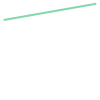

In [18]:
data[data.str_name=="Silbersteinstraße"].loc[351, "geometry"]

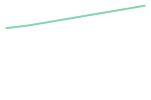

In [15]:
data[data.str_name=="Silbersteinstraße"].loc[2119, "geometry"]

In [14]:
data[data.str_name=="Silbersteinstraße"]

,gml_id,link_id,elem_nr,vnp,nnp,vst,bst,vricht,ebene,str_typ,strklasse1,strklasse,strklasse2,str_name,bezirk,stadtteil,dtvw_kfz,dtvw_lkw,geometry
351,s_vmengen2019.1314,49490054_T0038380,49490054_49490029.01,49490054,49490029,0,49,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,13100,230,"MULTILINESTRING ((394054.346 5814172.010, 3941..."
2119,s_vmengen2019.2906,48490031_T0039910,48490031_48490034.01,48490031,48490034,0,142,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,7200,130,"MULTILINESTRING ((393476.824 5814075.394, 3934..."
2303,s_vmengen2019.3071,T0044010_49490054,48490015_49490054.01,48490015,49490054,76,158,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,12800,230,"MULTILINESTRING ((393973.959 5814158.526, 3940..."
2994,s_vmengen2019.3694,48490007_T0038340,48490007_48490031.01,48490007,48490031,0,215,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,10400,170,"MULTILINESTRING ((393118.837 5814013.147, 3931..."
3848,s_vmengen2019.4462,T0038380_49490029,49490054_49490029.01,49490054,49490029,49,114,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,13100,230,"MULTILINESTRING ((394103.071 5814180.567, 3941..."
4272,s_vmengen2019.4844,48490009_48490015,48490009_48490015.02,48490009,48490015,0,119,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,12100,240,"MULTILINESTRING ((393781.227 5814125.995, 3938..."
4656,s_vmengen2019.519,T0039910_48490034,48490031_48490034.01,48490031,48490034,142,261,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,7200,130,"MULTILINESTRING ((393616.900 5814098.095, 3937..."
6490,s_vmengen2019.6840,48490034_48490009,48490034_48490009.02,48490034,48490009,0,48,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,12100,240,"MULTILINESTRING ((393734.109 5814117.088, 3937..."
6965,s_vmengen2019.7268,47480006_48490007,47480006_48490007.01,47480006,48490007,0,361,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,7700,110,"MULTILINESTRING ((392763.104 5813952.260, 3927..."
9363,s_vmengen2019.9426,T0038340_48490031,48490007_48490031.01,48490007,48490031,215,363,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,10400,170,"MULTILINESTRING ((393330.447 5814049.248, 3934..."


In [19]:
data

,gml_id,link_id,elem_nr,vnp,nnp,vst,bst,vricht,ebene,str_typ,strklasse1,strklasse,strklasse2,str_name,bezirk,stadtteil,dtvw_kfz,dtvw_lkw,geometry
0,s_vmengen2019.1,T0087260_51580007,51580010_51580007.01,51580010,51580007,44,102,B,0,S,I,B,STRA,Berliner Allee,Pankow,Weißensee,24500,1090,"MULTILINESTRING ((396106.053 5823917.524, 3960..."
1,s_vmengen2019.10,49520002_50520019,49520002_50520019.02,49520002,50520019,0,102,B,0,S,I,B,STRA,Stralauer Allee,Friedrichshain-Kreuzberg,Friedrichshain,33600,1330,"MULTILINESTRING ((394917.969 5817928.138, 3950..."
2,s_vmengen2019.100,43540017_43540018,43540017_43540018.02,43540017,43540018,0,180,B,0,S,III,G,STRA,Tiergartenstraße,Mitte,Tiergarten,19500,440,"MULTILINESTRING ((388458.549 5819016.555, 3884..."
3,s_vmengen2019.1000,48580019_48580022,48580019_48580022.02,48580019,48580022,0,182,B,0,S,II,G,STRA,Ostseestraße,Pankow,Prenzlauer Berg,27500,980,"MULTILINESTRING ((393842.593 5823309.960, 3939..."
4,s_vmengen2019.1001,40530035_40530016,40530035_40530016.01,40530035,40530016,0,116,B,0,S,III,G,STRA,Leibnizstraße,Charlottenburg-Wilmersdorf,Charlottenburg,15700,290,"MULTILINESTRING ((385583.225 5818857.361, 3855..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917,s_vmengen2019.995,44580034_44580035,44580034_44580035.01,44580034,44580035,0,50,B,0,S,II,G,STRA,Pankstraße,Mitte,Gesundbrunnen,14000,300,"MULTILINESTRING ((389571.098 5823026.381, 3895..."
9918,s_vmengen2019.996,45580001_T0065430,45580001_45580002.01,45580001,45580002,0,51,B,0,S,II,G,STRA,Badstraße,Mitte,Gesundbrunnen,31900,850,"MULTILINESTRING ((390034.624 5823810.058, 3900..."
9919,s_vmengen2019.997,44530052_44540050,44530052_44540050.02,44530052,44540050,0,168,R,-2,S,II,B,STRA,Tunnel Tiergarten Hauptfb zw Aus- u Einf Sony VSZ,Mitte,Tiergarten,16900,580,"MULTILINESTRING ((389497.280 5818975.886, 3894..."
9920,s_vmengen2019.998,44520005_45520026,44520005_45520026.01,44520005,45520026,0,144,B,0,S,III,G,STRA,Möckernstraße,Friedrichshain-Kreuzberg,Kreuzberg,11100,270,"MULTILINESTRING ((389994.243 5817268.148, 3899..."


# Aggregation of daily weather data averages 

In [104]:
import requests
import pandas as pd
start_date = "2022-07-01"
api_url = f"https://api.brightsky.dev/weather?lat=52.465455&lon=13.422762&date={start_date}"
dt = requests.get(api_url)

In [105]:
df = pd.DataFrame.from_dict(dt.json()["weather"])
df.index = pd.to_datetime(df['timestamp'])
df = df.resample("1d").mean()

In [106]:
df.columns

Index(['source_id', 'precipitation', 'pressure_msl', 'sunshine', 'temperature',
       'wind_direction', 'wind_speed', 'cloud_cover', 'dew_point',
       'relative_humidity', 'visibility', 'wind_gust_direction',
       'wind_gust_speed'],
      dtype='object')

In [114]:
## omit source_id (=> no weather data)
df.filter(items=['precipitation', 'pressure_msl', 'sunshine', 'temperature',
       'wind_direction', 'wind_speed', 'cloud_cover', 'dew_point',
       'relative_humidity', 'visibility', 'wind_gust_direction',
       'wind_gust_speed'])

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed
timestamp,,,,,,,,,,,,
2022-07-01 00:00:00+00:00,0.05,1015.204167,7.958333,19.458333,229.583333,15.666667,75.833333,15.7375,79.541667,26625.0,229.166667,27.458333
2022-07-02 00:00:00+00:00,0.00,1021.900000,0.000000,15.100000,240.000000,7.900000,12.000000,12.7000,85.000000,25000.0,250.000000,11.500000


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

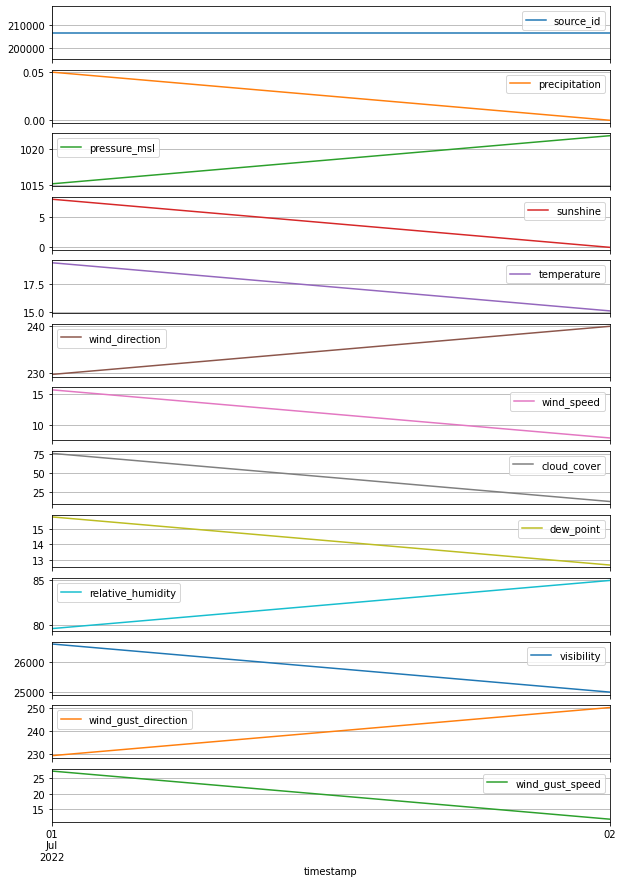

In [115]:
df.plot(subplots=True, figsize=(10, 15), grid=True)